In [1]:
# Library_Import#############################
# from numpy import *
import math
import numpy as np
import matplotlib.pyplot as plt
# Library_Import_end##########################



In [2]:
import sys
import os.path
import numpy as np
import pandas as pd
import wave
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
from collections import OrderedDict
from scipy import signal
from scipy.optimize import curve_fit 
from functools import wraps
from numba import jit


# ディレクトリの絶対パスを取得
current_dir = os.path.dirname(os.path.abspath("__file__"))
# モジュールのあるパスを追加
sys.path.append( str(current_dir) + '/../../../research_tools' )
print("Add path : /../../../research_tools")

get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline

plt.rcParams['font.family'] ='IPAPGothic' #使用するフォント
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.top'] = True #x軸の目盛線の上側を表示
plt.rcParams['ytick.right'] = True #y軸の目盛線の右側を表示
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 #軸の線幅edge linewidth。囲みの太さ
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 100 #dpiの設定
plt.rcParams['figure.subplot.hspace'] = 0.3 # 図と図の幅
plt.rcParams['figure.subplot.wspace'] = 0.3 # 図と図の幅

fig = plt.figure(figsize=(8, 11))

Add path : /../../../research_tools


<Figure size 800x1100 with 0 Axes>

In [3]:
try:
    import decorators
    import plot_tool
    import plot_tools
    import adaptive_filters
except ModuleNotFoundError as err:
    print(err)
    sys.path.append( str(current_dir) + '/programs' )
    print(sys.path)
    print("Add path : ./programs")
    import decorators
    import plot_tool
    import plot_tools
    import adaptive_filters


Window Not Found


In [4]:
def lms_agm(myu, update, end_con, smp_num):
    """
    myu:step size  , update:update count

    end_con:end condition ,smp_num:sample number

    """
    # global x
    # global d
    w = np.random.rand(d_size, 1)  # initial coefficient
    for i in np.arange(1, update+1):
        # find dot product of cofficients and numbers
        y = np.dot(np.array(w).T, np.array(x))
        e = d[smp_num, 0]-y  # find error
        w = w + x * np.array(e) * myu  # update w -> array(e)
        if(abs(e) < end_con):  # error threshold
            break

    y_opt = np.dot(np.array(w).T, np.array(x))  # ADF out

    return y_opt

In [5]:
d_size = 128

# static random function 
np.random.seed(seed=10)

# define time samples
t = np.array(np.linspace(0, d_size, d_size)).T

# static random function 
np.random.seed(seed=20)

# Make desired value
# d=array(sin(t)) #sine wave
d = np.random.rand(d_size, 1)

# static random function 
np.random.seed(seed=30)

# Make filter input figures
x = np.random.rand(d_size, 1)

# find norm square
x_norm_square = np.dot(x.T, x)

In [6]:
# ADF : Adaptive Filter
# Define output list
ADF_out = []
for j in np.arange(0, d_size, 1):
    end_con = float(lms_agm(myu=(1/x_norm_square), update=20, end_con=0.5, smp_num=j))
    ADF_out.append(end_con)

In [7]:
type(d)

numpy.ndarray

In [8]:
type(ADF_out)

list

In [9]:
ADF_out_arr = np.array(ADF_out)

In [10]:
ADF_out_nd = ADF_out_arr.reshape(len(ADF_out_arr), 1)

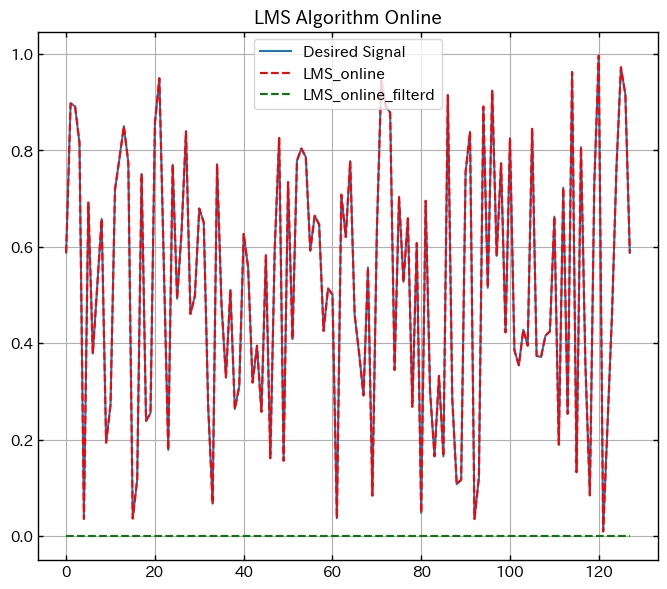

In [11]:
# _plot_command_############################
plt.figure(facecolor='w')  # Backgroundcolor_white
plt.plot(d, label="Desired Signal")
plt.plot(ADF_out_nd, "r--", label="LMS_online")
plt.plot(d-ADF_out_nd, "g--", label="LMS_online_filterd")
plt.grid()
plt.legend()
plt.title('LMS Algorithm Online')
try:
    plt.show()
except KeyboardInterrupt:
    plt.close('all')

In [12]:
from wave_process import wave_process

In [13]:
sys.path.append( str(current_dir) + '/../../../sample_wav' )
sample_wav = wave_process("../../../sample_wav/piano1_8do.wav")

分析対象ファイル： ../../../sample_wav/piano1_8do.wav
チャンクサイズ： 77440
サンプルサイズのバイト数： 2
チャンネル数： 2
wavファイルのサンプリング周波数： 44100
パラメータ :  _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=77440, comptype='NONE', compname='not compressed')
wavファイルのデータ個数： 77440


In [14]:
"""
d_size = sample_wav.chunk_size
# define time samples
t = np.array(np.linspace(0, d_size, d_size)).T

# Make desired value
# d=array(sin(t)) #sine wave
# d = np.random.rand(d_size, 1)
d = np.array(abs(sample_wav.data))
d = d.reshape(len(d), 1)
print(d.shape)

# Make filter input figures
x = np.random.rand(d_size, 1)
"""

'\nd_size = sample_wav.chunk_size\n# define time samples\nt = np.array(np.linspace(0, d_size, d_size)).T\n\n# Make desired value\n# d=array(sin(t)) #sine wave\n# d = np.random.rand(d_size, 1)\nd = np.array(abs(sample_wav.data))\nd = d.reshape(len(d), 1)\nprint(d.shape)\n\n# Make filter input figures\nx = np.random.rand(d_size, 1)\n'

## ここから下うまく動かない Nが多すぎるかも (コメントアウトしてある)##

In [15]:
"""
# ADF : Adaptive Filter
# Define output list
ADF_out = []
for j in np.arange(0, d_size, 1):
    end_con = float(lms_agm(myu=0.5, update=20, end_con=0.1, smp_num=j))
    ADF_out.append(end_con)
"""

'\n# ADF : Adaptive Filter\n# Define output list\nADF_out = []\nfor j in np.arange(0, d_size, 1):\n    end_con = float(lms_agm(myu=0.5, update=20, end_con=0.1, smp_num=j))\n    ADF_out.append(end_con)\n'

In [16]:
"""
# _plot_command_############################
plt.figure(facecolor='w')  # Backgroundcolor_white
plt.plot(np.array(abs(sample_wav.data)), label="Desired Signal")
plt.plot(np.array(ADF_out), "r--", label="LMS_online")
plt.grid()
plt.legend()
plt.title('LMS Algorithm Online')
try:
    plt.show()
except KeyboardInterrupt:
    plt.close('all')
"""

'\n# _plot_command_############################\nplt.figure(facecolor=\'w\')  # Backgroundcolor_white\nplt.plot(np.array(abs(sample_wav.data)), label="Desired Signal")\nplt.plot(np.array(ADF_out), "r--", label="LMS_online")\nplt.grid()\nplt.legend()\nplt.title(\'LMS Algorithm Online\')\ntry:\n    plt.show()\nexcept KeyboardInterrupt:\n    plt.close(\'all\')\n'

In [17]:
"""
plt.figure(facecolor='w')  # Backgroundcolor_white
plt.plot(np.array(abs(sample_wav.data)), label="Desired Signal")
"""

'\nplt.figure(facecolor=\'w\')  # Backgroundcolor_white\nplt.plot(np.array(abs(sample_wav.data)), label="Desired Signal")\n'

In [18]:
"""plt.plot(np.array(ADF_out), "r--", label="LMS_online")
"""

'plt.plot(np.array(ADF_out), "r--", label="LMS_online")\n'

# NLMS試作

$$
\boldsymbol{w}(k+1) = \boldsymbol{w}(k) + \frac{ \alpha \boldsymbol{x}(k) e(k) }{ ||\boldsymbol{x}(k)||^2 + \epsilon}  \quad \{ 0 < \alpha < 2 \}
$$

In [19]:
def nlms_agm(alpha, update, end_con, smp_num):
    """
    alpha:step size 0 < alpha < 2 , update:update count

    end_con:end condition ,smp_num:sample number

    """
    # global x
    # global d

    w = np.random.rand(d_size, 1)  # initial coefficient
    for i in np.arange(1, update+1):
        # find dot product of cofficients and numbers
        y = np.dot(np.array(w).T, np.array(x))
        e = d[smp_num, 0]-y  # find error
        # update w -> array(e)
        # (+ 1e-8) : avoid dividing by 0
        w = w + alpha * np.array(e) * x / (x_norm_square + 1e-8)
        if(abs(e) < end_con):  # error threshold
            break

    y_opt = np.dot(np.array(w).T, np.array(x))  # ADF out

    return y_opt

In [20]:
d_size = 128

# static random function 
np.random.seed(seed=10)

# define time samples
t = np.array(np.linspace(0, d_size, d_size)).T

# static random function 
np.random.seed(seed=20)

# Make desired value
# d=array(sin(t)) #sine wave
d = np.random.rand(d_size, 1)

# static random function 
np.random.seed(seed=30)

# Make filter input figures
x = np.random.rand(d_size, 1)

# find norm square
x_norm_square = np.dot(x.T, x)


In [21]:
# ADF : Adaptive Filter
# Define output list
NADF_out = []
for j in np.arange(0, d_size, 1):
    nend_con = float(nlms_agm(alpha=1, update=20, end_con=0.5, smp_num=j))
    NADF_out.append(nend_con)

In [22]:
NADF_out_arr = np.array(NADF_out)

In [23]:
NADF_out_nd = NADF_out_arr.reshape(len(NADF_out_arr), 1)

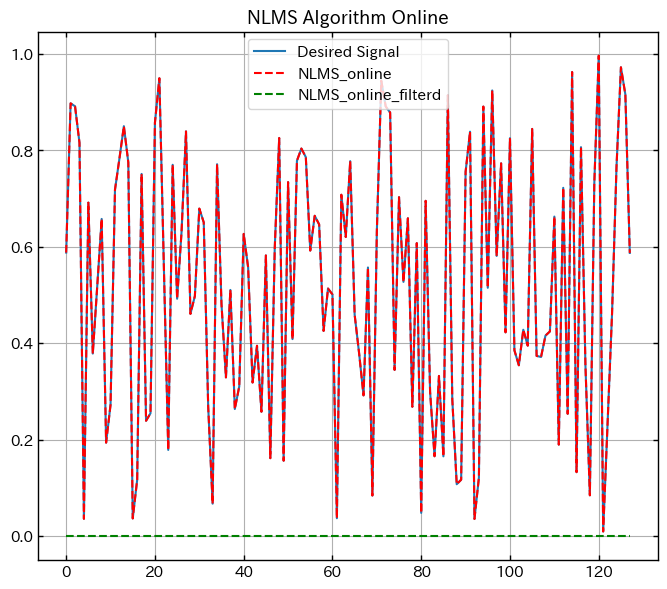

In [24]:
# _plot_command_############################
plt.figure(facecolor='w')  # Backgroundcolor_white
plt.plot(d, label="Desired Signal")
plt.plot(NADF_out_nd, "r--", label="NLMS_online")
plt.plot(d-NADF_out_nd, "g--", label="NLMS_online_filterd")
plt.grid()
plt.legend()
plt.title('NLMS Algorithm Online')
try:
    plt.show()
except KeyboardInterrupt:
    plt.close('all')

# NLMS モジュールテスト

In [25]:
d_size = 128

# Make desired value
# d=array(sin(t)) #sine wave
d = np.random.rand(16382, 1)

###############  START  ###############


/Users/tetsu/personal_files/Research/filters/test/LMS_Algorithm_Online/../../../research_tools/adaptive_filters.py:69: UserWarning: the data was not divisible by adf_N, the last part was truncated.               original sample : 16382 > 16256 : truncated sample
  original sample : {len(d)} > {sample_len} : truncated sample")


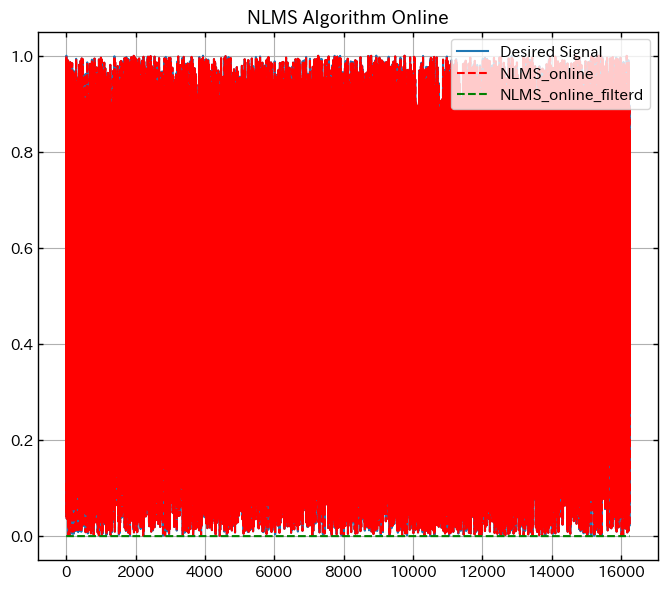

###############  END  ###############
4.42056[sec] elapsed to execute the function:nlms_agm_on


In [26]:
ADF_out = decorators.stop_watch(
                                adaptive_filters.nlms_agm_on)(
                                    alpha=1.3, update_count=20, threshold=0.0000001, d=d, adf_N=d_size)

/Users/tetsu/personal_files/Research/filters/test/LMS_Algorithm_Online/../../../research_tools/adaptive_filters.py:69: UserWarning: the data was not divisible by adf_N, the last part was truncated.               original sample : 16382 > 16256 : truncated sample
  original sample : {len(d)} > {sample_len} : truncated sample")


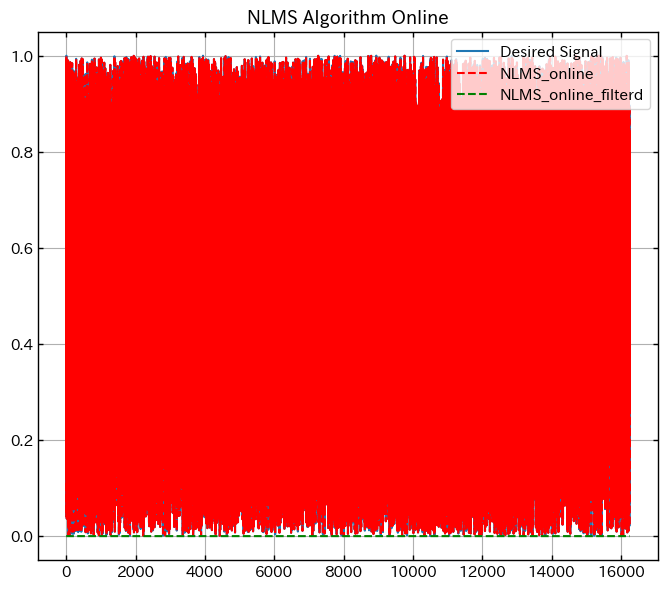

CPU times: user 3.91 s, sys: 61.1 ms, total: 3.97 s
Wall time: 3.98 s


In [42]:
%%time
ADF_out = adaptive_filters.nlms_agm_on(alpha=1.3, update_count=20, threshold=0.0000001, d=d, adf_N=d_size)

# フィルタ適用後との類似度を調べる

# ユークリッド距離は正規化できないからだめ

In [38]:
euclid_distance = np.linalg.norm(ADF_out - ADF_out)

In [39]:
euclid_distance

0.0

#  相互相関係数なら時系列を扱える、正規化もできる

In [29]:
d_1d = d.reshape(len(d),)
d_1d = (d_1d - np.mean(d_1d))
d_1d_std = np.std(d_1d)
print(d_1d_std)
ADF_out_1d = ADF_out.reshape(len(ADF_out),)
ADF_out_1d = (ADF_out_1d - np.mean(ADF_out_1d))
ADF_out_1d_std = np.std(ADF_out_1d)
print(ADF_out_1d_std)

0.28809663457697626
0.2881065589088763


```
a = (a - np.mean(a)) / (np.std(a) * len(a))
b = (b - np.mean(b)) / (np.std(b))
c = np.correlate(a, b, 'full')
```

In [30]:
d_1d = d_1d / (d_1d_std * len(d_1d))

In [31]:
ADF_out_1d = ADF_out_1d / ADF_out_1d_std

In [32]:
corr = np.correlate(d_1d, ADF_out_1d, "full")

In [33]:
corr_gragh = plot_tools.PlotTools(y=corr, fs=48000, fft_N=len(corr), stft_N=128, window="rectangular")

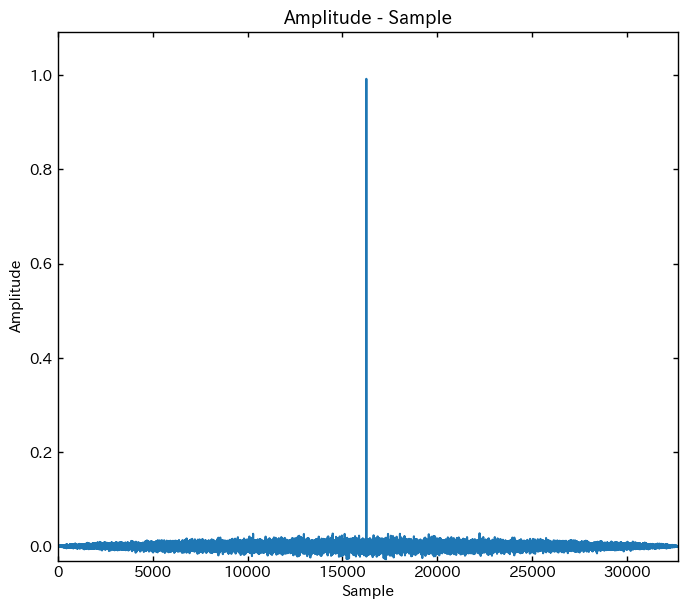

In [34]:
jjj

In [35]:
corr.max()

0.9923428147849869